# Trabajo 3
## Modelo de clasificación


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Se utiliza un dataset de clasificación de vidrio extraido de https://www.kaggle.com/uciml/glass

In [3]:
data = pd.read_csv('glass.csv')

El dataset cuenta con las siguientes variables independientes:&nbsp;

**RI**: refractive index &nbsp;

**Na**: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10) &nbsp;

**Mg**: Magnesium &nbsp;

**Al**: Aluminum &nbsp;

**Si**: Silicon &nbsp;

**K**:Potassium &nbsp;

**Ca**: Calcium &nbsp;

**Ba**: Barium &nbsp;

**Fe**: Iron &nbsp;

La columna **Type** es la variable dependiente siendo que existen 7 tipos de vidrios: &nbsp;

**1**: buildingwindowsfloatprocessed &nbsp;

**2**: buildingwindowsnonfloatprocessed &nbsp;

**3**: vehiclewindowsfloatprocessed &nbsp;

**5**: containers &nbsp;

**6**: tableware &nbsp;

**7**: headlamps &nbsp;

El tipo 4 es vehiclewindowsnonfloatprocessed pero no hay ejemplos del mismo en este dataset.&nbsp;

Se realiza una exploración del dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


Se observa como estádistribuida la variable independiente **Type** en el dataset. Se concluye que no encuentra balanceada siendo que hay gran cantidad de observaciones de tipo 1 y 2.

In [6]:
data["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [9]:
round(data["Type"].value_counts(normalize=True),2)

2    0.36
1    0.33
7    0.14
3    0.08
5    0.06
6    0.04
Name: Type, dtype: float64

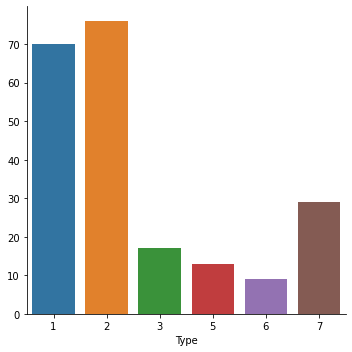

In [31]:
g = sns.catplot(data=data, x="Type", kind="count")
(g.set_axis_labels("Type", ""))

plt.savefig("Distribución Type.jpg")


Se genera un pariplot para analizar la relación entre las variables independientes usando como etiqueta **Type**

C:\Users\Usuario\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Usuario\anaconda3\envs\dhdsblend\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


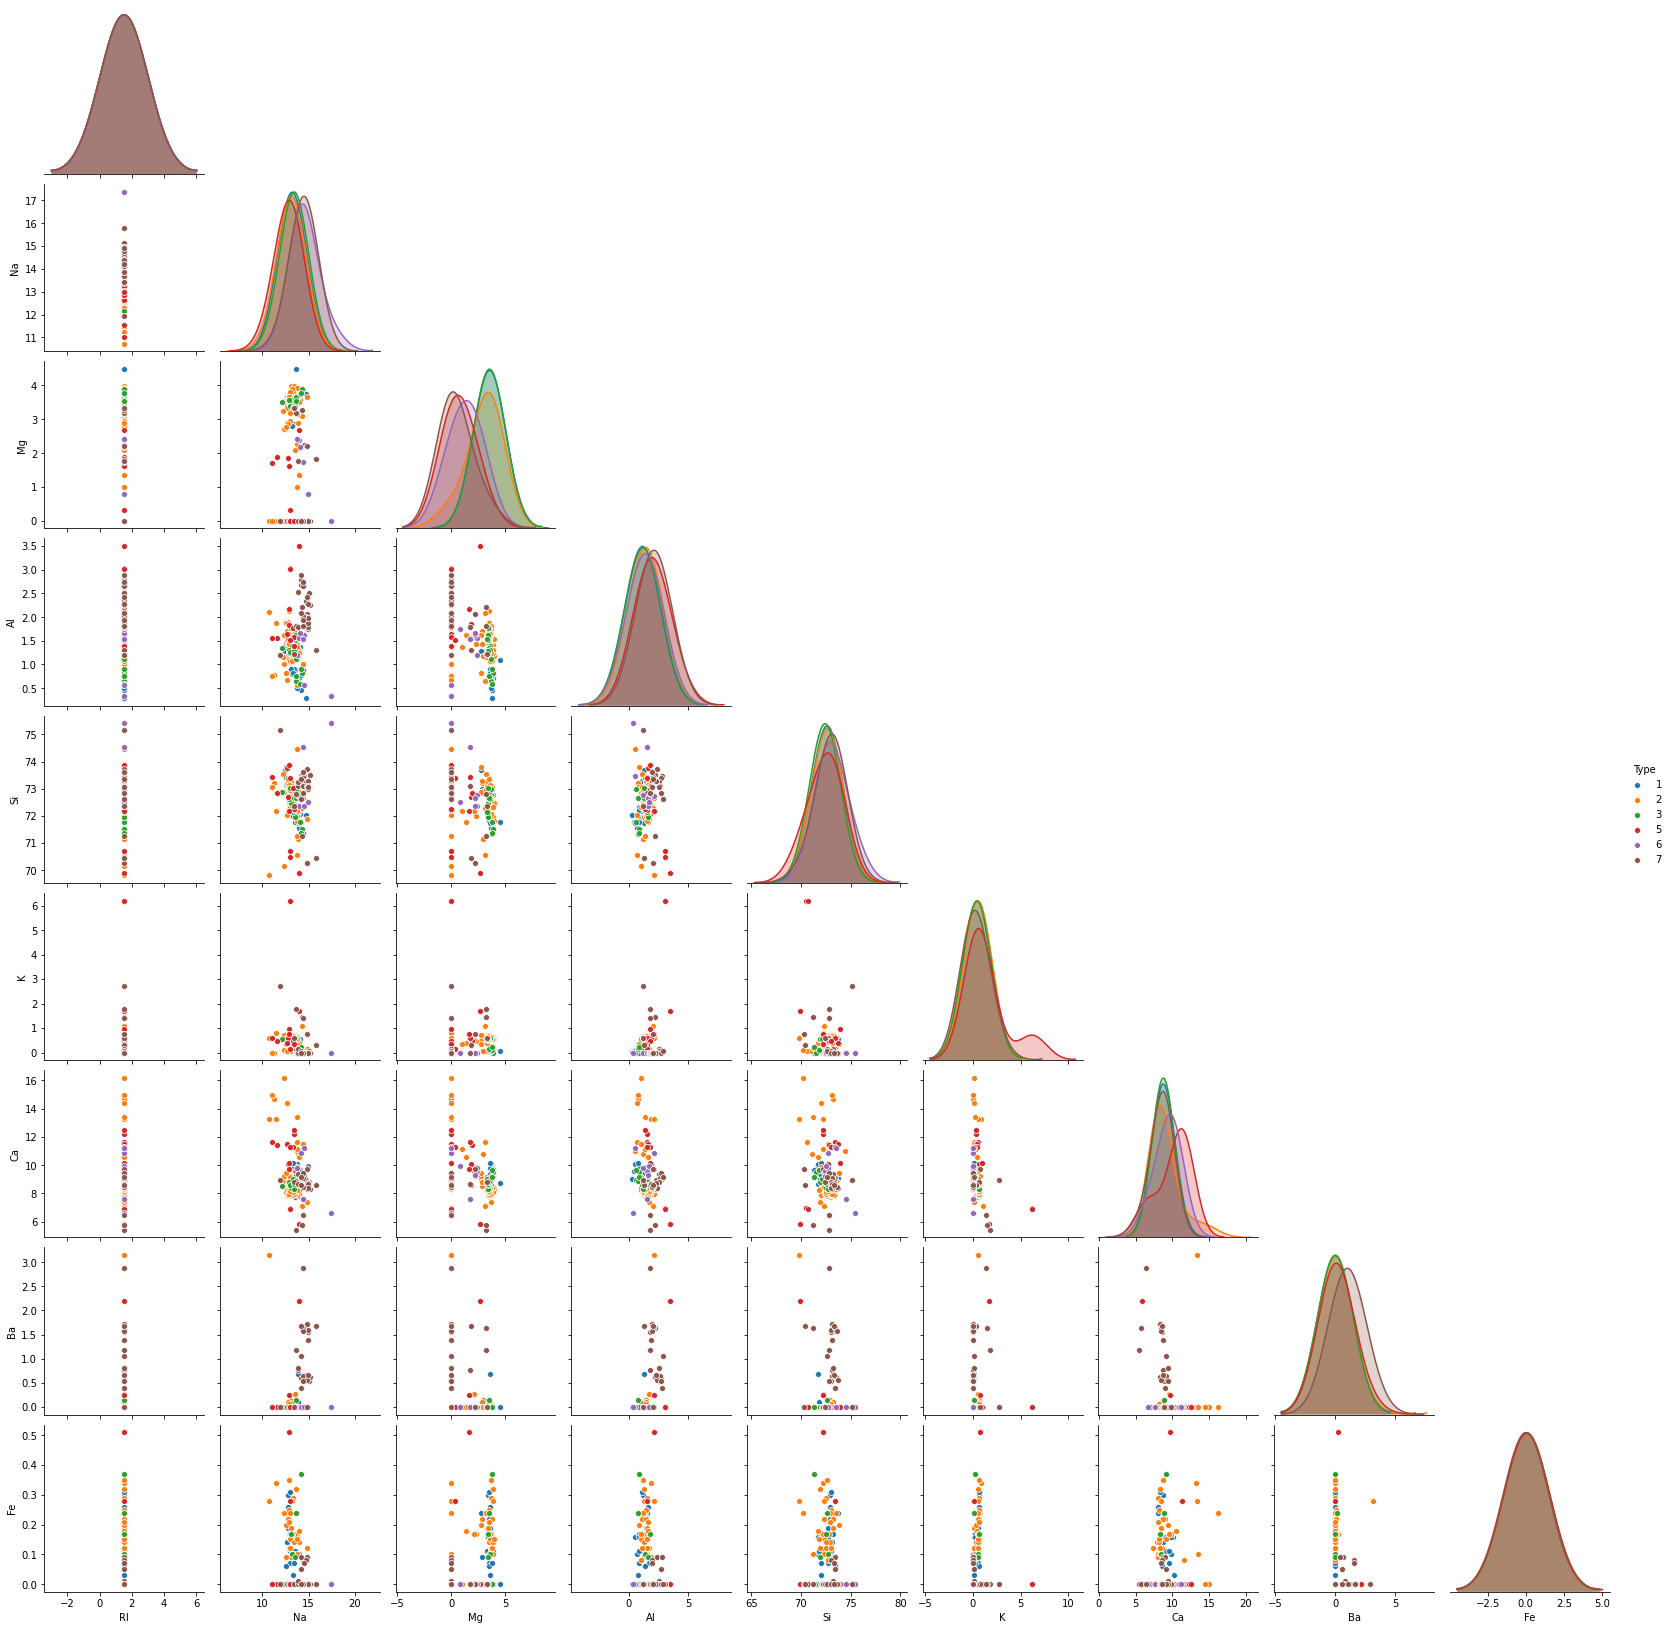

In [32]:
sns.pairplot(data, hue="Type", corner=True, diag_kws = {'bw': 1.5})

plt.savefig("Pairplot.jpg")


Se genera un heatmap de las correlaciones entre todas las variables (explicativas y **Type**)

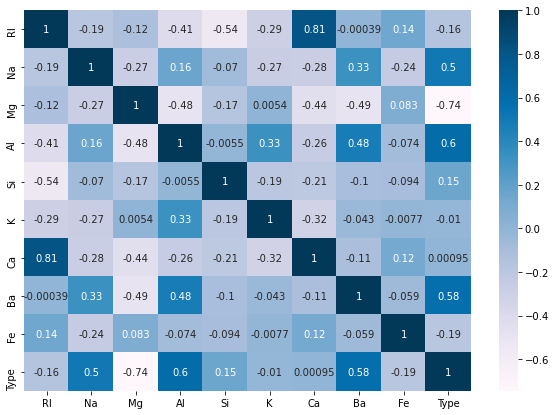

In [33]:
fig= plt.subplots(figsize = (10, 7))
sns.heatmap(data.corr(), annot=True, cmap="PuBu")

plt.savefig("Heatmap correlaciones.jpg")


#### Reducción de dimensionalidad para gráfico
Para poder tener una mayor claridad de la distribución de la variable **Type** se realiza una reducción de dimensionalidad con PCA para obtener 2 componentes y poder generar un gráfico de distribución.  

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [23]:
#Se separan las variables explicativas (X) de la variable a explicar (y)
X=data.drop(["Type"], axis=1)
y=data["Type"]

In [23]:
#En primer lugar se estandarizan los datos con StandarScaler
sca = StandardScaler()
X_sca=sca.fit_transform(X)

#Se instancia un modelo PCA con 2 componentes principales
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_sca)
X_pca.shape

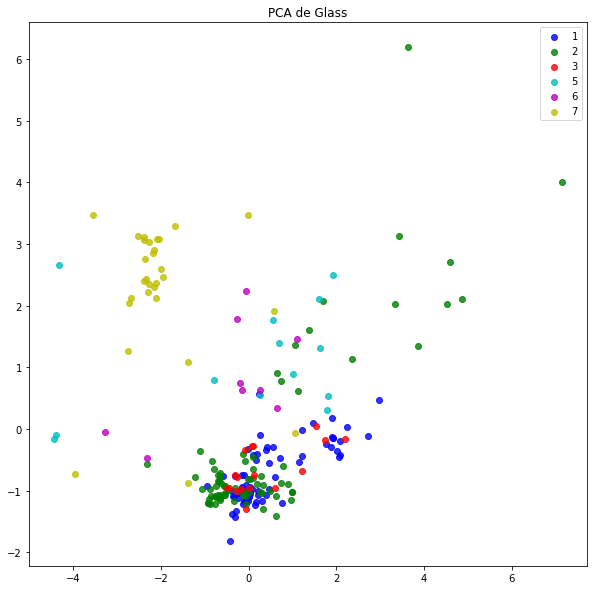

In [34]:
#Gráfico con 2 componentes principales y las etiquetas de "Type"

target_names = y.unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y']

fig= plt.subplots(figsize = (10, 10   ))
for color, i, target_name in zip(colors, [1, 2, 3, 5, 6,7], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA de Glass')

plt.savefig("Distribución Glass con PCA.jpg")


## Modelos de clasificación

#### Modelos con reducción de dimensionalidad
Se divide en datos de entrenamiento y testeo. &nbsp;

Se genera una función con un pipeline con los siguientes pasos: estandarización, reducción de dimensionalidad y modelo de clasificación.  &nbsp;

Utilizamos Gridsearch para analizar los datos de entrenamiento y obtener el mejor modelo entre las distintas opciones:  &nbsp;

**Estandirazación**: se prueba con *StandarScaler* y *MinMaxScaler*.  &nbsp;

**Reducción**: se prueba con *PCA* modificando el hiperparámetro de *número de componentes*. &nbsp;

**Clasificador**: se intenta con un clasificador *Nayive Bayes Gaussiano*; una *Regresión Lógistica* modificando el hiperparámetro *C*; un *KNeighborsClassificador* modificando los hiperparámetros *n_neighbors* y *weights*.&nbsp;


Se define la mejor combinación de pasos de acuerdo a mejor accuracy y luego se medirá su rendimiento con los datos de testeo con distintas métricas. Por último se generará una matriz de confusión con los resultados.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold 

cv_scores :  [0.7        0.63333333 0.76666667 0.63333333 0.72413793]
Pipeline(steps=[('scal_preproc', MinMaxScaler()),
                ('reduccion', PCA(n_components=4)),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=4, weights='distance'))])
best score train 0.7381609195402298
score test 0.6153846153846154
classification_report(y_test, y_pred_grid)
               precision    recall  f1-score   support

           1       0.57      0.62      0.59        21
           2       0.65      0.65      0.65        23
           3       0.20      0.20      0.20         5
           5       1.00      0.50      0.67         4
           6       0.67      0.67      0.67         3
           7       0.78      0.78      0.78         9

    accuracy                           0.62        65
   macro avg       0.64      0.57      0.59        65
weighted avg       0.63      0.62      0.62        65



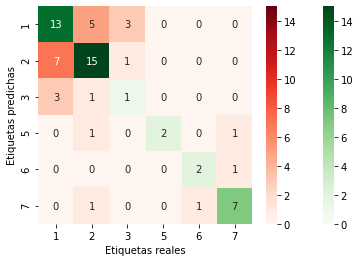

In [50]:
def pipe_reduccion_dimensionalidad(X,y):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    pasos = [('scal_preproc', StandardScaler()),('reduccion', PCA()),('clasificador', GaussianNB())]
    pipe = Pipeline(pasos)
    
    param_grid = [{'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'reduccion__n_components': range(1,10,1),
                   'clasificador': [GaussianNB()]},
                  {'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'reduccion__n_components': range(1,10,1),
                   'clasificador': [LogisticRegression(max_iter=500)],
                   'clasificador__C': [0.01,0.1,1,10,100]},
                  {'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'reduccion__n_components': range(1,10,1),
                   'clasificador': [KNeighborsClassifier()],
                   'clasificador__n_neighbors':range(2,40,2),
                   'clasificador__weights':['uniform','distance']}]
                              
                   
    from sklearn.model_selection import cross_val_score, KFold 
    folds=KFold(n_splits=5,shuffle=True, random_state=42) #KFold() StratifiedKFold()
    
    grid= GridSearchCV(pipe, param_grid, cv=folds, scoring='accuracy')
    
    grid.fit(X_train, y_train)
    cv_scores = cross_val_score(grid, X_train, y_train, cv=folds)
    print('cv_scores : ',cv_scores)
    print(grid.best_estimator_)
    print('best score train',grid.best_score_)
    print('score test',accuracy_score(grid.best_estimator_.predict(X_test),y_test))
    
    y_pred_grid = grid.predict(X_test)
    print ('classification_report(y_test, y_pred_grid)\n',classification_report(y_test, y_pred_grid))
    confusion = confusion_matrix(y_test, y_pred_grid)

    #graficamos la matriz de confusion   
    x_axis_labels = [1,2,3,5,6,7] 
    y_axis_labels = [1,2,3,5,6,7] 
    vmin = np.min(confusion)
    vmax = np.max(confusion)
    off_diag_mask = np.eye(*confusion.shape, dtype=bool)
    fig = plt.figure()
    sns.heatmap(confusion, annot=True, mask=~off_diag_mask, cmap='Greens', vmin=vmin, vmax=vmax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sns.heatmap(confusion, annot=True, mask=off_diag_mask, cmap='Reds', vmin=vmin, vmax=vmax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel("Etiquetas reales")
    plt.ylabel("Etiquetas predichas")
    plt.savefig("Matriz de confusión Pipe con Reduccion de dimensionalidad.jpg")
    return

pipe_reduccion_dimensionalidad(X,y)

#### Modelo con selector de columnas
Se genera un nuevo pipeline con los mismos pasos que el anterior, pero en lugar de hacer la reducción del dataset con PCA, se intentará realizarlo eliminando variables. Luego se comparará ese resultado con el obtenido en el pipeline anterior.

In [53]:
#Primero creamos una clase para seleccionar columnas llamada FeatureSelection

from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [54]:
#Instanciamos la clase con distintas opciones de columnas para quitar

selector_ca=FeatureSelection(selected_features=X.drop(columns="Ca").columns.values)
selector_kca=FeatureSelection(selected_features=X.drop(columns=["Ca","K"]).columns.values)
selector_kcasi=FeatureSelection(selected_features=X.drop(columns=["Ca","K","Si"]).columns.values)
selector_kcasiri=FeatureSelection(selected_features=X.drop(columns=["Ca","K","Si","RI"]).columns.values)
selector_ri=FeatureSelection(selected_features=X.drop(columns=["RI"]).columns.values)
selector_si=FeatureSelection(selected_features=X.drop(columns=["Si"]).columns.values)
selector_k=FeatureSelection(selected_features=X.drop(columns=["K",]).columns.values)

Se crea un nuevo pipeline:

Se divide en datos de entrenamiento y testeo. &nbsp;

Se genera una función con un pipeline con los siguientes pasos: selección de columnas, estandarización y modelo de clasificación.  &nbsp;

Utilizamos Gridsearch para analizar los datos de entrenamiento y obtener el mejor modelo entre las distintas opciones:  &nbsp;

**Selección de columnas**: se prueba con los distintos selectores creados quitando las columnas que no tenían relevancia explicativa significativa con la variable *Type*, de acuerdo al gráfico de correlaciones previo.  &nbsp;

**Estandirazación**: se prueba con *StandarScaler* y *MinMaxScaler*.  &nbsp;

**Clasificador**: se intenta con un clasificador *Nayive Bayes Gaussiano*; una *Regresión Lógistica* modificando el hiperparámetro *C*; un *KNeighborsClassificador* modificando los hiperparámetros *n_neighbors* y *weights*.&nbsp;


Se define la mejor combinación de pasos de acuerdo a mejor accuracy y luego se medirá su rendimiento con los datos de testeo con distintas métricas. Por último se generará una matriz de confusión con los resultados.

cv_scores :  [0.7        0.66666667 0.73333333 0.63333333 0.65517241]
Pipeline(steps=[('seleccion', None), ('scal_preproc', StandardScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=2, weights='distance'))])
best score train 0.7248275862068965
score test 0.6615384615384615
classification_report(y_test, y_pred_grid)
               precision    recall  f1-score   support

           1       0.57      0.57      0.57        21
           2       0.65      0.74      0.69        23
           3       0.33      0.40      0.36         5
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         9

    accuracy                           0.66        65
   macro avg       0.76      0.69      0.71        65
weighted avg       0.69      0.66      0.67        65



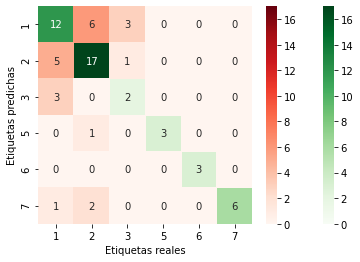

In [56]:
def pipe_seleccion_columnas(X,y):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
    
    pasos = [('seleccion', selector_ca),('scal_preproc', StandardScaler()),('clasificador', GaussianNB())]
    pipe = Pipeline(pasos)
    
    param_grid = [{'seleccion': [selector_ca,selector_kca,selector_kcasi,selector_kcasiri,selector_ri,selector_si,selector_k, None],
                   'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'clasificador': [GaussianNB()]},
                  {'seleccion': [selector_ca,selector_kca,selector_kcasi,selector_kcasiri,selector_ri,selector_si,selector_k, None],
                   'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'clasificador': [LogisticRegression(max_iter=500)],
                   'clasificador__C': [0.01,0.1,1,10,100]},
                  {'seleccion': [selector_ca,selector_kca,selector_kcasi,selector_kcasiri,selector_ri,selector_si,selector_k, None],
                   'scal_preproc':[StandardScaler(), MinMaxScaler()],
                   'clasificador': [KNeighborsClassifier()],
                   'clasificador__n_neighbors':range(2,40,2),
                   'clasificador__weights':['uniform','distance']}]
                              
                   
    from sklearn.model_selection import cross_val_score, KFold 
    folds=KFold(n_splits=5,shuffle=True, random_state=42) #KFold() StratifiedKFold()
    
    grid= GridSearchCV(pipe, param_grid, cv=folds, scoring='accuracy')
    
    grid.fit(X_train, y_train)
    cv_scores = cross_val_score(grid, X_train, y_train, cv=folds)
    print('cv_scores : ',cv_scores)
    print(grid.best_estimator_)
    print('best score train',grid.best_score_)
    print('score test',accuracy_score(grid.best_estimator_.predict(X_test),y_test))
    
    y_pred_grid = grid.predict(X_test)
    print ('classification_report(y_test, y_pred_grid)\n',classification_report(y_test, y_pred_grid))
    confusion = confusion_matrix(y_test, y_pred_grid)
    
    #gráficamos la matriz de confusión
    x_axis_labels = [1,2,3,5,6,7] 
    y_axis_labels = [1,2,3,5,6,7] 
    vmin = np.min(confusion)
    vmax = np.max(confusion)
    off_diag_mask = np.eye(*confusion.shape, dtype=bool)
    fig = plt.figure()
    sns.heatmap(confusion, annot=True, mask=~off_diag_mask, cmap='Greens', vmin=vmin, vmax=vmax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    sns.heatmap(confusion, annot=True, mask=off_diag_mask, cmap='Reds', vmin=vmin, vmax=vmax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    plt.xlabel("Etiquetas reales")
    plt.ylabel("Etiquetas predichas")
    plt.savefig("Matriz de confusión Pipe con Selección columnas.jpg")h
    return

pipe_seleccion_columnas(X,y)

#### Conclusión

Al comparar el modelo con reducción de dimensionalidad y el de selección de columnas, se observa un resultado muy similar: en el caso de la reducción de dimensionalidad (PCA con 5 componentes) el accuracy de los datos de entrenamiento es 0.74 y de testeo es 0.61 y en el caso de la selección de columnas (dataset completo) y el accuracy en los datos de entrenamiento es 0.72 y en los datos de testeo es 0.66.  &nbsp;

Por lo tanto el mejor modelo de clasificación del dataset Glass, en virtud de los datos de testeo es **utilizando la totalidad del dataset, haciendo una normalización estandar (StandarScaler), utilizando un modelo KNeighborsClassifier con hiperparámetros n_neighbors=2 y weights='distance'.**


###### Gráfico del modelo
Para comparar resultados se utilizó el modelo seleccionado para generar nuevas etiquetas y se realizó el mismo gráfico de distribución que se había generado haciendo una reducción de dimensionalidad con PCA con dos componentes principales con etiquetas originales .

In [59]:
#Anteriormente se había generado X_sca con StandarScaler()
#Se instancia un modelo KNN con n_neighbors=2 y weights='distance'
knn=KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_sca,y)

#Se crear nuevas etiquetas para graficar
y_pred = knn.predict(X_sca)

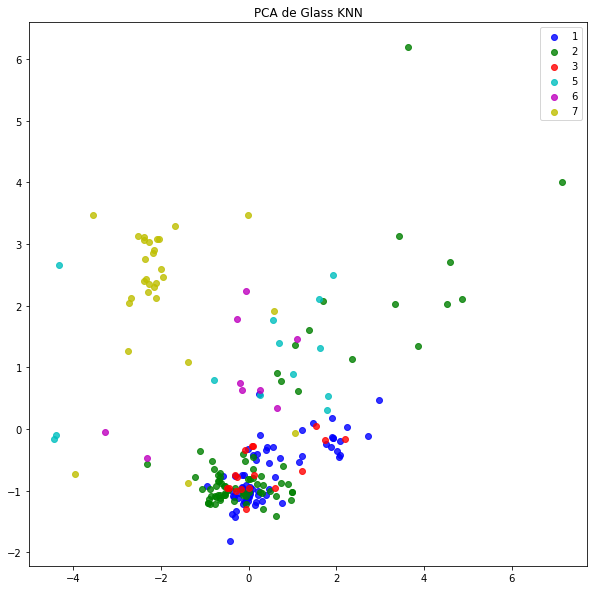

In [64]:
#Se realiza el mismo gráfico que anteriormente pero utilizando las nuevas etiquetas de "Type"

target_names = y.unique()
colors = ['b', 'g', 'r', 'c', 'm', 'y']

fig= plt.subplots(figsize = (10, 10))
for color, i, target_name in zip(colors, [1, 2, 3, 5, 6,7], target_names):
    plt.scatter(X_pca[y_pred == i, 0], X_pca[y_pred == i, 1], color=color, alpha=.8,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA de Glass KNN')

plt.savefig("Distribución Glass-KNN con PCA.jpg")


A simple vista el gráfico es exactamente igual por lo que se instancia sobre la equivalencia de los dos gráficos y se comprueba que no son iguales. Por lo que se concluye que el creado es un clasificador aceptable.

In [65]:
"Distribución Glass con PCA.jpg" == "Distribución Glass-KNN con PCA.jpg"

False